In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import FreqDist
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler


# Read the CSV files
file1 = "E:/WowAI/Song lyrics trial/csv/ArianaGrande.csv"   
file2 = "E:/WowAI/Song lyrics trial/csv/Beyonce.csv"
file3 = "E:/WowAI/Song lyrics trial/csv/BillieEilish.csv"
file4 = "E:/WowAI/Song lyrics trial/csv/BTS.csv"
file5 = "E:/WowAI/Song lyrics trial/csv/CardiB.csv"
file6 = "E:/WowAI/Song lyrics trial/csv/CharliePuth.csv"
file7 = "E:/WowAI/Song lyrics trial/csv/ColdPlay.csv"
file8 = "E:/WowAI/Song lyrics trial/csv/Drake.csv"
file9 = "E:/WowAI/Song lyrics trial/csv/DuaLipa.csv"
file10 = "E:/WowAI/Song lyrics trial/csv/EdSheeran.csv"
file11 = "E:/WowAI/Song lyrics trial/csv/Eminem.csv"
file12 = "E:/WowAI/Song lyrics trial/csv/JustinBieber.csv"
file13 = "E:/WowAI/Song lyrics trial/csv/KatyPerry.csv"
file14 = "E:/WowAI/Song lyrics trial/csv/Khalid.csv"
file15 = "E:/WowAI/Song lyrics trial/csv/LadyGaga.csv"
file16 = "E:/WowAI/Song lyrics trial/csv/Maroon5.csv"
file17 = "E:/WowAI/Song lyrics trial/csv/NickiMinaj.csv"
file18 = "E:/WowAI/Song lyrics trial/csv/PostMalone.csv"
file19 = "E:/WowAI/Song lyrics trial/csv/Rihanna.csv"
file20 = "E:/WowAI/Song lyrics trial/csv/SelenaGomez.csv"
file21 = "E:/WowAI/Song lyrics trial/csv/TaylorSwift.csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)
df8 = pd.read_csv(file8)
df9 = pd.read_csv(file9)
df10 = pd.read_csv(file10)
df11 = pd.read_csv(file11)
df12 = pd.read_csv(file12)
df13 = pd.read_csv(file13)
df14 = pd.read_csv(file14)
df15 = pd.read_csv(file15)
df16 = pd.read_csv(file16)
df17 = pd.read_csv(file17)
df18 = pd.read_csv(file18)
df19 = pd.read_csv(file19)
df20 = pd.read_csv(file20)
df21 = pd.read_csv(file21)

# Concatenate the dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,
df13, df14, df15, df16, df17, df18, df19, df20, df21])

# Define the genre mapping
genre_mapping = {
'Ariana Grande': 'Pop',
'Beyoncé': 'R&B Pop',
'Billie Eilish': 'Alternative Indie',
'BTS (방탄소년단)': 'KPop',
'Cardi B': 'Hip Hop',
'Charlie Puth': 'Pop',
'Coldplay': 'Alternative Indie',
'Drake': 'Hip Hop',
'Dua Lipa': 'Pop',
'Ed Sheeran': 'Pop',
'Eminem': 'Hip Hop',
'Justin Bieber': 'Pop',
'Katy Perry': 'Pop',
'Khalid': 'R&B Pop',
'Lady Gaga': 'Pop',
'Maroon 5': 'Pop Rock',
'Nicki Minaj': 'Hip Hop',
'Post Malone': 'Hip Hop',
'Rihanna': 'R&B Pop',
'Selena Gomez': 'Pop',
'Taylor Swift': 'Pop Country'
}

# Map the genre to each artist
df['Genre'] = df['Artist'].apply(lambda x: f"Genre {genre_mapping.get(x, 'Unknown')}")

# drop
df.drop(['Unnamed: 0','Title','Album','Date'],axis=1,inplace=True)
df.head()

# Display the modified dataframe
df.head()

,Artist,Lyric,Year,Genre
0,Ariana Grande,thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop
1,Ariana Grande,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop
2,Ariana Grande,you you love it how i move you you love it how...,2018.0,Genre Pop
3,Ariana Grande,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop
4,Ariana Grande,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current

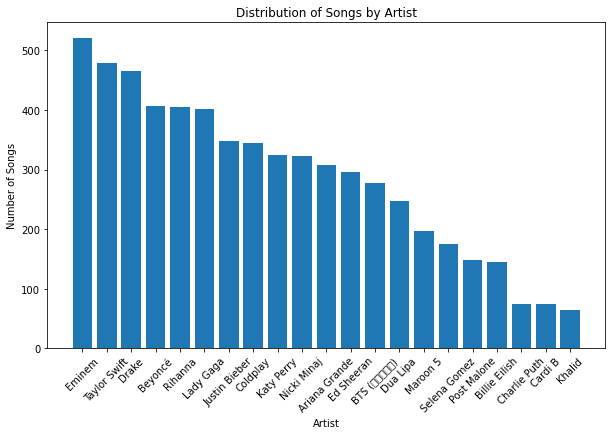

In [2]:
# Plot the distribution of songs by artist
artist_counts = df['Artist'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(artist_counts.index, artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Artist')
plt.xticks(rotation=45)
plt.show()

In [3]:
# Check for missing values
df.isnull().sum()

# Remove rows with missing lyric values
df = df.dropna()
df.isnull().sum()

# Check for duplicate lyrics
duplicates = df[df['Lyric'].duplicated()]

# Remove duplicate lyrics
merged1 = df.merge(duplicates, indicator=True, how='left')
df = merged1[merged1['_merge'] == 'left_only'].drop(columns='_merge')

# Count the number of words in each lyric
df['Number_of_words'] = df['Lyric'].apply(lambda x: len(str(x).split()))

# Filter indexes where the number of words is less than 20
def filter_indexes(df):
    indexes = []
    c = 0

    def filter_lyrics_word(x):
        nonlocal c
        nonlocal indexes
        if x < 20:
            indexes.append(df.index[c])
        c += 1

    df['Number_of_words'].apply(filter_lyrics_word)

    return indexes, c

indexes, count = filter_indexes(df)
print("indexes = ",indexes)
print("count = ",count)

# Filter the dataframe based on the indexes
def filter_dataframe(df, indexes):
    filtered_df = df.loc[indexes]

    merged = df.merge(filtered_df, indicator=True, how='left')
    df = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')

    return df

filtered_df = filter_dataframe(df, indexes)
df = filtered_df
print(df.head())

# Summary statistics of the number of words
df['Number_of_words'].describe()

indexes =  [136, 221, 236, 240, 412, 448, 490, 566, 575, 835, 855, 856, 882, 1110, 1158, 1522, 1581, 1582, 1669, 1751, 1758, 1929, 1955, 1956, 2217, 2342, 2351, 2353, 2355, 2540, 3010, 3019, 3025, 3363, 3364, 3365, 3882, 3893, 3911, 3924, 3929]
count =  4147
          Artist                                              Lyric    Year  \
0  Ariana Grande  thought i'd end up with sean but he wasn't a m...  2018.0   
1  Ariana Grande  yeah breakfast at tiffany's and bottles of bub...  2019.0   
2  Ariana Grande  you you love it how i move you you love it how...  2018.0   
3  Ariana Grande  ariana grande  nicki minaj i've been here all ...  2016.0   
4  Ariana Grande  right now i'm in a state of mind i wanna be in...  2018.0   

       Genre  Number_of_words  
0  Genre Pop              463  
1  Genre Pop              490  
2  Genre Pop              439  
3  Genre Pop              551  
4  Genre Pop              500  


count    4106.000000
mean      424.612518
std       306.122832
min        20.000000
25%       259.000000
50%       368.000000
75%       516.000000
max      5768.000000
Name: Number_of_words, dtype: float64

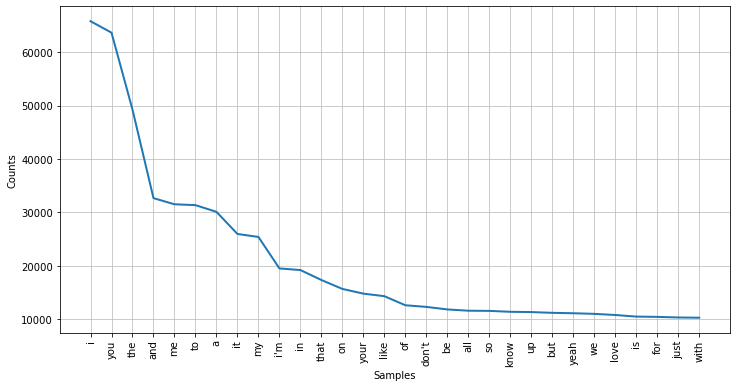

In [4]:
all_lyrics = ' '.join(df['Lyric'])
tokens = all_lyrics.split()
freq_dist = FreqDist(tokens)
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.show()

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

<Figure size 864x432 with 0 Axes>

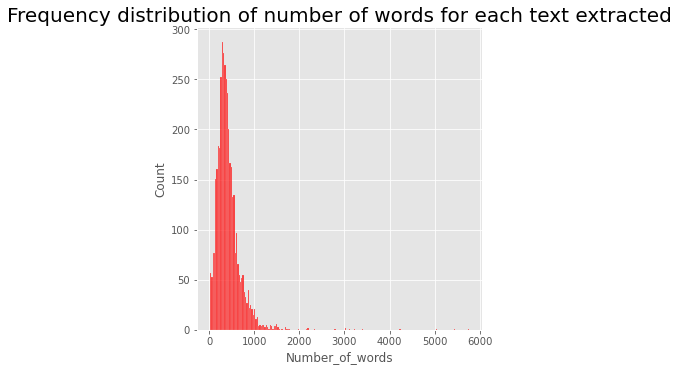

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
sns.displot(df['Number_of_words'], kde=False, color="red", bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

In [6]:
# Remove HTML tags from the lyrics
def strip_html(text):
    return re.sub(r'<.*?>', '', str(text))

# Convert lyrics to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Remove special characters from the lyrics
def special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', str(text))


df['Lyric'] = df['Lyric'].apply(strip_html)
df['Lyric'] = df['Lyric'].apply(convert_to_lowercase)
df['Lyric'] = df['Lyric'].apply(special_chars)

df.dropna(inplace=True)
df.head()

,Artist,Lyric,Year,Genre,Number_of_words
0,Ariana Grande,thought id end up with sean but he wasnt a mat...,2018.0,Genre Pop,463
1,Ariana Grande,yeah breakfast at tiffanys and bottles of bubb...,2019.0,Genre Pop,490
2,Ariana Grande,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,ariana grande nicki minaj ive been here all n...,2016.0,Genre Pop,551
4,Ariana Grande,right now im in a state of mind i wanna be in ...,2018.0,Genre Pop,500


In [7]:
text_as_list = []
frequencies = {}
uncommon_words = set()

MIN_FREQUENCY = 7
MIN_SEQ = 5
BATCH_SIZE =  32

def extract_text(text):
    global text_as_list
    text_as_list += [w for w in text.split(' ') if w.strip() != '' or w == '\n']

df['Lyric'].apply( extract_text )

for w in text_as_list:
    frequencies[w] = frequencies.get(w, 0) + 1

uncommon_words = set([key for key in frequencies.keys() if frequencies[key] < MIN_FREQUENCY])

words = sorted(set([key for key in frequencies.keys() if frequencies[key] >= MIN_FREQUENCY]))


num_words = len(words)

word_indices = dict((w, i) for i, w in enumerate(words))

indices_word = dict((i, w) for i, w in enumerate(words))

print('Words with less than {} appearances: {}'.format( MIN_FREQUENCY, len(uncommon_words)))

print('Words with more than {} appearances: {}'.format( MIN_FREQUENCY, len(words)))

valid_seqs = []

end_seq_words = []

for i in range(len(text_as_list) - MIN_SEQ ):
    end_slice = i + MIN_SEQ + 1

    if len( set(text_as_list[i:end_slice]).intersection(uncommon_words) ) == 0:
        valid_seqs.append(text_as_list[i: i + MIN_SEQ])
        end_seq_words.append(text_as_list[i + MIN_SEQ])

print('Valid sequences of size {}: {}'.format(MIN_SEQ, len(valid_seqs)))
print(df.head())

print(valid_seqs[:5])
print(end_seq_words[:5])

Words with less than 7 appearances: 29283
Words with more than 7 appearances: 8511
Valid sequences of size 5: 1446985
          Artist                                              Lyric    Year  \
0  Ariana Grande  thought id end up with sean but he wasnt a mat...  2018.0   
1  Ariana Grande  yeah breakfast at tiffanys and bottles of bubb...  2019.0   
2  Ariana Grande  you you love it how i move you you love it how...  2018.0   
3  Ariana Grande  ariana grande  nicki minaj ive been here all n...  2016.0   
4  Ariana Grande  right now im in a state of mind i wanna be in ...  2018.0   

       Genre  Number_of_words  
0  Genre Pop              463  
1  Genre Pop              490  
2  Genre Pop              439  
3  Genre Pop              551  
4  Genre Pop              500  
[['thought', 'id', 'end', 'up', 'with'], ['id', 'end', 'up', 'with', 'sean'], ['end', 'up', 'with', 'sean', 'but'], ['up', 'with', 'sean', 'but', 'he'], ['with', 'sean', 'but', 'he', 'wasnt']]
['sean', 'but', 'he', 

In [8]:
import pandas as pd

# Define the functions to create the columns
def extract_valid_seqs(text):
    valid_seqs = []
    end_seq_words = []
    text_as_list = []

    MIN_FREQUENCY = 7
    MIN_SEQ = 5

    def extract_text(text):
        nonlocal text_as_list
        text_as_list += [w for w in text.split(' ') if w.strip() != '' or w == '\n']

    extract_text(text)

    frequencies = {}
    uncommon_words = set()

    for w in text_as_list:
        frequencies[w] = frequencies.get(w, 0) + 1

    uncommon_words = set([key for key in frequencies.keys() if frequencies[key] < MIN_FREQUENCY])

    for i in range(len(text_as_list) - MIN_SEQ):
        end_slice = i + MIN_SEQ + 1

        if len(set(text_as_list[i:end_slice]).intersection(uncommon_words)) == 0:
            valid_seqs.append(text_as_list[i: i + MIN_SEQ])
            end_seq_words.append(text_as_list[i + MIN_SEQ])

    return valid_seqs


def extract_end_seq_words(text):
    valid_seqs = []
    end_seq_words = []
    text_as_list = []

    MIN_FREQUENCY = 7
    MIN_SEQ = 5

    def extract_text(text):
        nonlocal text_as_list
        text_as_list += [w for w in text.split(' ') if w.strip() != '' or w == '\n']

    extract_text(text)

    frequencies = {}
    uncommon_words = set()

    for w in text_as_list:
        frequencies[w] = frequencies.get(w, 0) + 1

    uncommon_words = set([key for key in frequencies.keys() if frequencies[key] < MIN_FREQUENCY])

    for i in range(len(text_as_list) - MIN_SEQ):
        end_slice = i + MIN_SEQ + 1

        if len(set(text_as_list[i:end_slice]).intersection(uncommon_words)) == 0:
            valid_seqs.append(text_as_list[i: i + MIN_SEQ])
            end_seq_words.append(text_as_list[i + MIN_SEQ])

    return end_seq_words


# Apply the functions to create the columns
df["valid_seqs"] = df["Lyric"].apply(extract_valid_seqs)
df["end_seq_words"] = df["Lyric"].apply(extract_end_seq_words)

# Display the updated DataFrame
df.head()


,Artist,Lyric,Year,Genre,Number_of_words,valid_seqs,end_seq_words
0,Ariana Grande,thought id end up with sean but he wasnt a mat...,2018.0,Genre Pop,463,"[[and, for, that, i, say], [for, that, i, say,...","[thank, you, next, next, thank, you, next, nex..."
1,Ariana Grande,yeah breakfast at tiffanys and bottles of bubb...,2019.0,Genre Pop,490,"[[it, i, like, it, i], [i, like, it, i, want],...","[want, it, i, got, it, yeah, i, want, it, i, g..."
2,Ariana Grande,you you love it how i move you you love it how...,2018.0,Genre Pop,439,"[[you, my, one, when, all], [and, done, youll,...","[is, is, a, woman, and, i, i, a, woman, i, is,..."
3,Ariana Grande,ariana grande nicki minaj ive been here all n...,2016.0,Genre Pop,551,"[[ive, been, here, all, night], [been, here, a...","[ariana, ive, been, here, all, day, side, to, ..."
4,Ariana Grande,right now im in a state of mind i wanna be in ...,2018.0,Genre Pop,500,"[[aint, got, no, tears, left], [got, no, tears...","[to, cry, so, im, pickin, it, up, pickin, it, ..."


In [9]:
# Remove rows with empty lists in valid_seqs and end_seq_words columns
df = df.drop(df[df['valid_seqs'].apply(lambda x: len(x) == 0)].index)
df = df.drop(df[df['end_seq_words'].apply(lambda x: len(x) == 0)].index)

df = df.sample(n=1000, weights='Number_of_words', random_state=1)

# Function to flatten and convert a list of words to text
def flatten_and_convert_to_text(word_list):
    flattened_text = ''
    for item in word_list:
        if isinstance(item, list):
            flattened_text += flatten_and_convert_to_text(item) + ' '
        else:
            flattened_text += item + ' '
    return flattened_text.strip()

# Apply the flatten_and_convert_to_text function to the 'valid_seqs' and 'end_seq_words' columns
df['valid_seqs'] = df['valid_seqs'].apply(flatten_and_convert_to_text)
df['end_seq_words'] = df['end_seq_words'].apply(flatten_and_convert_to_text)

# Print the modified DataFrame
df.head()


,Artist,Lyric,Year,Genre,Number_of_words,valid_seqs,end_seq_words
1825,Ed Sheeran,part shape of you ed sheeran the club isnt ...,2017.0,Genre Pop,884,that body on me come body on me come on ed she...,on now with the body and body body body body o...
2870,Lady Gaga,lady gaga rapapumpum rapapumpum rapapumpum rap...,2008.0,Genre Pop,313,lady gaga rapapumpum rapapumpum rapapumpum la ...,rapapumpum la la la la la la la la la la la la...
0,Ariana Grande,thought id end up with sean but he wasnt a mat...,2018.0,Genre Pop,463,and for that i say for that i say thank that i...,thank you next next thank you next next thank ...
1354,Drake,drake knocking on the door dj paul twhy ayy ay...,2018.0,Genre Hip Hop,513,ayy ayy yeah you know ayy yeah you know what y...,what im sayin gyeah gyeah gyeah gyeah drake ye...
669,BTS (방탄소년단),jimin jungkook dont wanna b...,2016.0,Genre KPop,383,i fall fall fall fall fall fall fall fall save...,save me save me i me save me me save me me i f...


In [10]:
# Concatenate all text columns
all_text = pd.concat([df['Artist'], df['Genre'], df['valid_seqs'], df['end_seq_words']], ignore_index=True)

# Define the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(all_text)

# Define the maximum sequence length
max_sequence_length = 100  # Example value, adjust as per your data

# Define the scaler for numerical columns
scaler = StandardScaler()

# Fit the scaler on the numerical data
numerical_data = df[['Year', 'Number_of_words']]  # Replace 'df' with your dataset
scaler.fit(numerical_data)

# Define the transformers for text and numerical columns
def transform_text(x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=max_sequence_length)

def transform_numerical(x):
    return scaler.transform(x)

In [11]:
np.save('tokenizer_word_index.npy', tokenizer.word_index)

# Save the scaler as .npy file
np.save('scaler_mean_scale.npy', [scaler.mean_, scaler.scale_])

In [12]:
# Create the preprocessed data
X_text = df[['Artist', 'Genre', 'valid_seqs']].apply(lambda x: ' '.join(x), axis=1)
X_text = transform_text(X_text)
X_numerical = transform_numerical(df[['Year', 'Number_of_words']])

# Combine the preprocessed text and numerical data
X = np.concatenate([X_text, X_numerical], axis=1)

# Create the target data
y = transform_text(df['end_seq_words'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train[:2])
print()
print(y_test[:2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0 283  15   4 283
   15   4   1  31   9  95 283  15   4 283  15   4 283  15   4   1  31   9
   95 283  15   4 283  15   4 283  15   4 283  15   4 283  15   4   1  31
    9  95  15   4 283  15   4 283  15   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   7]]

[[  0   0   0   0   0   0   0   0   0   0   0   0   8 267 108   1   2   8
  267 108   1  14   2 108   1 564   2  73   8 267 108   1   8 267 108   1
    2  73   8 267 108   

In [19]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

# Get the vocabulary size
vocabulary_size = len(tokenizer.word_index) + 1

# Define the text input
text_input = Input(shape=(max_sequence_length,))
x = Embedding(input_dim=vocabulary_size, output_dim=50, input_length=max_sequence_length)(text_input)
x = LSTM(units=64, return_sequences=True)(x)

# Define the numerical input
numerical_input = Input(shape=(2,))
y = Dense(units=32, activation='relu')(numerical_input)
y = RepeatVector(max_sequence_length)(y) # Repeat the Dense layer's output

# Concatenate the output of the two branches
combined = concatenate([x, y])

# Apply a TimeDistributed(Dense(...)) layer
output = TimeDistributed(Dense(units=vocabulary_size, activation='softmax'))(combined)

# Instantiate the model
model = Model(inputs=[text_input, numerical_input], outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 50)      87100       ['input_3[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           96          ['input_4[0][0]']                
                                                                                            

Epoch 1/10
25/25 [==============================] - 5s 132ms/step - loss: 7.1224 - accuracy: 0.2596 - val_loss: 6.2119 - val_accuracy: 0.3977
Epoch 2/10
25/25 [==============================] - 3s 112ms/step - loss: 5.1160 - accuracy: 0.4159 - val_loss: 4.5334 - val_accuracy: 0.3993
Epoch 3/10
25/25 [==============================] - 3s 112ms/step - loss: 4.1619 - accuracy: 0.4162 - val_loss: 4.4229 - val_accuracy: 0.3993
Epoch 4/10
25/25 [==============================] - 3s 112ms/step - loss: 4.0692 - accuracy: 0.4162 - val_loss: 4.3977 - val_accuracy: 0.3993
Epoch 5/10
25/25 [==============================] - 3s 112ms/step - loss: 4.0350 - accuracy: 0.4162 - val_loss: 4.3959 - val_accuracy: 0.3993
Epoch 6/10
25/25 [==============================] - 3s 111ms/step - loss: 4.0057 - accuracy: 0.4162 - val_loss: 4.3976 - val_accuracy: 0.3993
Epoch 7/10
25/25 [==============================] - 3s 111ms/step - loss: 3.9839 - accuracy: 0.4162 - val_loss: 4.3990 - val_accuracy: 0.3993
Epoch 

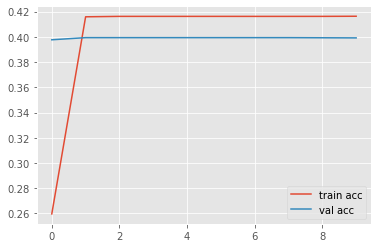

In [20]:
# Fit the model
X_train_text = X_train[:, :max_sequence_length]
X_train_numerical = X_train[:, max_sequence_length:]
X_test_text = X_test[:, :max_sequence_length]
X_test_numerical = X_test[:, max_sequence_length:]

from keras.utils import to_categorical

# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=vocabulary_size)
y_test_categorical = to_categorical(y_test, num_classes=vocabulary_size)

# Fit the model
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit([X_train_text, X_train_numerical], y_train_categorical, epochs=10, batch_size=32, validation_data=([X_test_text, X_test_numerical], y_test_categorical))

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [15]:
# Save the model
model.save('music_model.h5')
# Save model weights
model.save_weights('music_model_weights.h5')


In [21]:
combined_data = np.concatenate((X_train, X_test), axis=0)
seed_index = np.random.randint(len(combined_data))
seed = combined_data[seed_index]

def generate_merged_text(seed_text, num_of_words, diversity, artist, genre, year):
    seed_tokens = tokenizer.texts_to_sequences([seed_text + artist + genre + year])
    seed_tokens = pad_sequences(seed_tokens, maxlen=max_sequence_length)

    numerical_inputs = scaler.transform([[year, num_of_words]])

    generated_text = seed_text

    for _ in range(num_of_words):
        prediction = model.predict([seed_tokens, numerical_inputs])
        prediction = prediction[0][-1]

        prediction /= np.sum(prediction)  # Normalize probabilities

        valid_indices = [idx for word, idx in tokenizer.word_index.items() if idx < len(prediction)]
        output_word_index = np.random.choice(valid_indices, p=prediction[valid_indices] / np.sum(prediction[valid_indices]))
        output_word = tokenizer.index_word.get(output_word_index, '')

        generated_text += ' ' + output_word

        seed_tokens = np.append(seed_tokens[:, 1:], [[output_word_index]], axis=1)

    return generated_text

generated_music = generate_merged_text("I am lonely, I am feeling very sad today", num_of_words=200, diversity=0.5, artist="Ariana Grande", genre="Pop", year="2018")
print(generated_music)


1/1 [==============================] - 0s 30ms/step
I am lonely, I am feeling very sad today you out me and make dont stay make that my my not fuck under id i to cold to theres and stupid oh you out said hanging na yeah loves yeah up woah that to is whos youre ho make cant music in it the damn its me and be in you man you la know me out it diamond that we rain wanna ooh myself up girl out today on that day you now is merry not it following done im in that came my its bout and love play little metal grammy on oh my play bad the young night you i you now in get one small you place ive its me on phresh while worry it you up out she the but so you no na wipe border if we love the i look me yeah a hand let her you down me a gon love you too own myself the count wanna bad you my a i doin you i go wish tonight see mmm cause well i ayy mm if baby when you here on what know a me the a i name mmm shit you pacewon it girl giving of i high yeah


In [22]:
import textblob
from enchant.checker import SpellChecker

def correct_spelling(paragraph):
    # Use textblob for initial spell checking
    blob = textblob.TextBlob(paragraph)
    corrected_paragraph = blob.correct()

    # Use enchant as a fallback for words that may not be corrected properly
    checker = SpellChecker("en_US")
    checked_paragraph = []

    # Iterate over the corrected words and check for spelling errors
    for word in corrected_paragraph.words:
        if checker.check(word):
            checked_paragraph.append(word)
        else:
            suggestions = checker.suggest(word)
            if suggestions:
                checked_paragraph.append(suggestions[0])
            else:
                checked_paragraph.append(word)

    return " ".join(checked_paragraph)

# Example usage
corrected_paragraph = correct_spelling(generated_music)
print(corrected_paragraph)


I am lonely I am feeling very sad today you out me and make font stay make that my my not fuck under id i to cold to there and stupid oh you out said hanging an yeah loves yeah up Noah that to is who your ho make can music in it the damn its me and be in you man you la know me out it diamond that we rain anna ooh myself up girl out today on that day you now is merry not it following done in in that came my its bout and love play little metal gray on oh my play bad the young night you i you now in get one small you place give its me on thresh while worry it you up out she the but so you no an wipe border if we love the i look me yeah a hand let her you down me a on love you too own myself the count anna bad you my a i down you i go wish tonight see mm cause well i any mm if baby when you here on what know a me the a i name mm shit you mace wen it girl giving of i high yeah


In [23]:
import random
import nltk
from nltk.corpus import cmudict

nltk.download('cmudict')
pronouncing_dict = cmudict.dict()

def get_rhyming_words(word, level=1):
    word = word.lower()
    pronunciations = pronouncing_dict.get(word)
    rhyming_words = []

    if pronunciations:
        for w, pron in pronouncing_dict.items():
            if pron[0][-level:] == pronunciations[0][-level:]:
                rhyming_words.append(w)

    return rhyming_words

def expand_lyrics(words):
    expanded_lyrics = words.copy()
    for word in words:
        rhyming_words = get_rhyming_words(word)
        if rhyming_words:
            random_word = random.choice(rhyming_words)
            expanded_lyrics.append(random_word)
    return expanded_lyrics

def capitalize_lines(text):
    lines = text.split("\n")
    capitalized_lines = [line.capitalize() for line in lines]
    return "\n".join(capitalized_lines)

def generate_verse(lyrics):
    verse = []
    verse.append(lyrics)
    verse.append("")  
    return "\n".join(verse)

def generate_chorus(lyrics):
    chorus = []
    chorus.append(lyrics)
    chorus.append("")  
    return "\n".join(chorus)

def generate_bridge(lyrics):
    bridge = []
    bridge.append(lyrics)
    bridge.append("")  
    return "\n".join(bridge)

def generate_song(words, rhyme_scheme, verse_length, chorus_length, bridge_length):
    song_parts = []
    lyrics_idx = 0
    rhyme_idx = 0

    while lyrics_idx < len(words):
        if lyrics_idx + verse_length <= len(words) and rhyme_scheme[rhyme_idx] == 'A':
            verse_lyrics = " ".join(words[lyrics_idx:lyrics_idx + verse_length])
            song_parts.append(generate_verse(verse_lyrics))
            lyrics_idx += verse_length
        elif lyrics_idx + chorus_length <= len(words) and rhyme_scheme[rhyme_idx] == 'B':
            chorus_lyrics = " ".join(words[lyrics_idx:lyrics_idx + chorus_length])
            song_parts.append(generate_chorus(chorus_lyrics))
            lyrics_idx += chorus_length
        elif lyrics_idx + bridge_length <= len(words) and rhyme_scheme[rhyme_idx] == 'C' and bridge_length > 0:
            bridge_lyrics = " ".join(words[lyrics_idx:lyrics_idx + bridge_length])
            song_parts.append(generate_bridge(bridge_lyrics))
            lyrics_idx += bridge_length
        else:
            break  # add a break condition in case we can't increment lyrics_idx

        rhyme_idx = (rhyme_idx + 1) % len(rhyme_scheme)

    song = "\n".join(song_parts)
    return song

generated_lyrics = corrected_paragraph
words = generated_lyrics.split()

words = expand_lyrics(words)

verse_length = 10
chorus_length = 6
bridge_length = 4  # add some length for the bridge for "ABABC" scheme
rhyme_scheme = "ABCAB"

song = generate_song(words, rhyme_scheme, verse_length, chorus_length, bridge_length)

formatted_song = capitalize_lines(song)

print(formatted_song)


[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


I am lonely i am feeling very sad today you

Out me and make font stay

Make that my my

Not fuck under id i to cold to there and

Stupid oh you out said hanging

An yeah loves yeah up noah that to is who

Your ho make can music in

It the damn its

Me and be in you man you la know me

Out it diamond that we rain

Anna ooh myself up girl out today on that day

You now is merry not it

Following done in in

That came my its bout and love play little metal

Gray on oh my play bad

The young night you i you now in get one

Small you place give its me

On thresh while worry

It you up out she the but so you no

An wipe border if we love

The i look me yeah a hand let her you

Down me a on love you

Too own myself the

Count anna bad you my a i down you i

Go wish tonight see mm cause

Well i any mm if baby when you here on

What know a me the a

I name mm shit

You mace wen it girl giving of i high yeah

Thigh harmonium bobbie underly schwam tripping

Javorsky rectified monterrey goo armac